In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
def spectral_radiance(Lambda,T,h,c,Kb):
  return (2*h*c**2)/((Lambda**5)*(np.exp(h*c/(Lambda*Kb*T))-1))

In [3]:
def plotDataSet(filename: str) :
    x = []
    y = []
    with open(filename, "r") as file:
        data = file.readlines()
        for i in data:
            x.append(float(i.split(",")[0]))
            y.append(float(i.split(",")[1].strip()))
    plt.figure(); plt.plot(x,y)

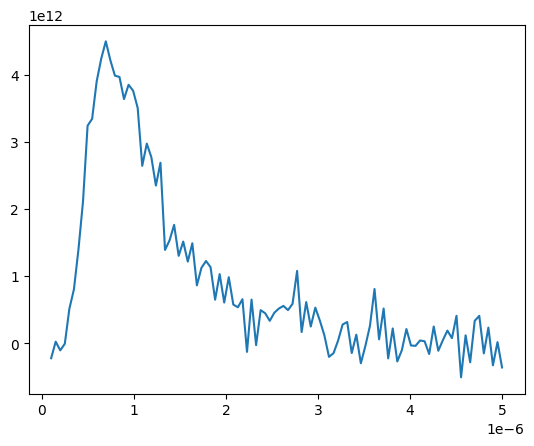

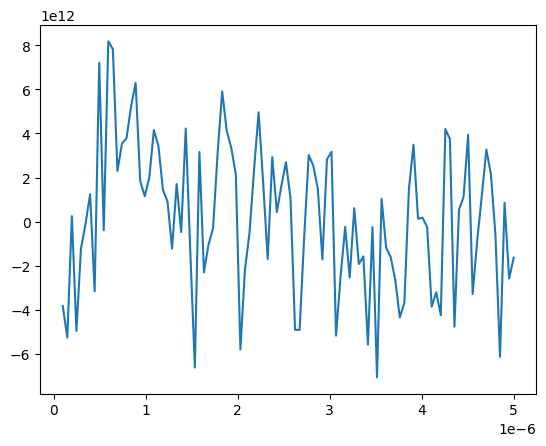

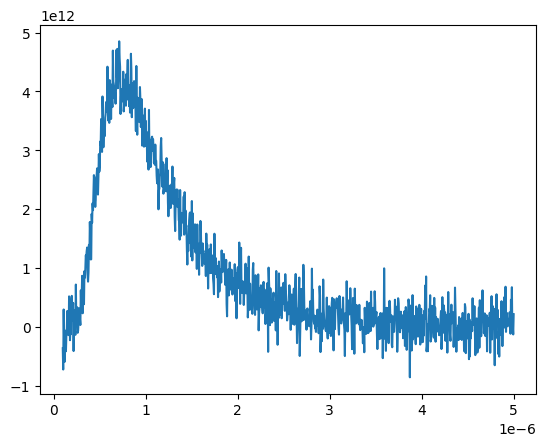

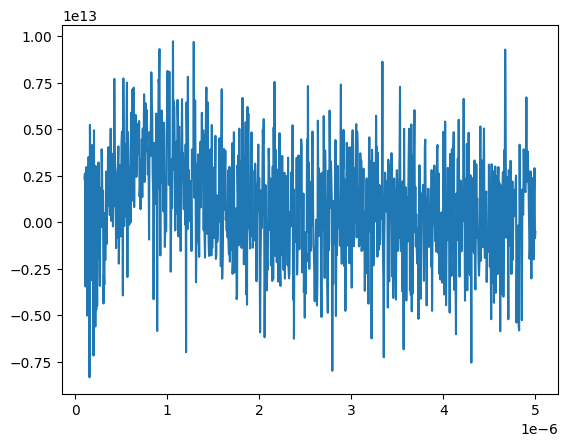

In [5]:
plotDataSet("../d1.txt")
plotDataSet("../d2.txt")
plotDataSet("../d3.txt")
plotDataSet("../d4.txt")

In [6]:
initparams = np.array([1,1e-9, 3e8,1])

[1.e+00 1.e-09 3.e+08 1.e+00]


/tmp/ipykernel_156976/1842541053.py:2: RuntimeWarning: overflow encountered in exp
  return (2*h*c**2)/((Lambda**5)*(np.exp(h*c/(Lambda*Kb*T))-1))
/tmp/ipykernel_156976/176961054.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance = sp.optimize.curve_fit(func, x[50:], y[50:],p0=arr)


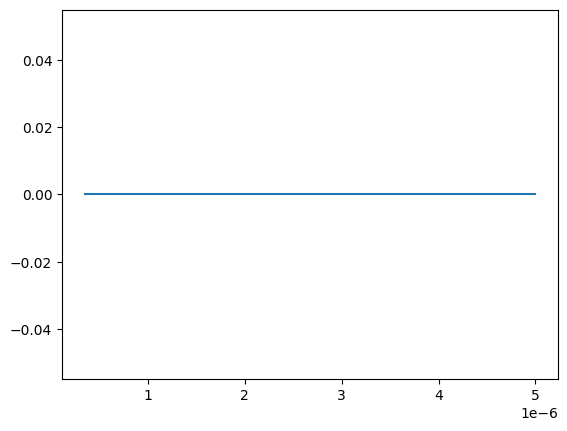

In [8]:
def fitcurve(in_file,arr,func):
    x = []
    y = []
    with open(in_file, "r") as file:
        data = file.readlines()
        for i in data:
            x.append(float(i.split(",")[0]))
            y.append(float(i.split(",")[1].strip()))
    params, params_covariance = sp.optimize.curve_fit(func, x[50:], y[50:],p0=arr)
    plt.plot(x[50:],func(np.array(x[50:]),*params))
   
    return (params)

params=fitcurve("../d3.txt",initparams,spectral_radiance)
print(params)